### Multiple Linear Regression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df_index=pd.read_csv('economic_index.csv')

In [4]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [7]:
### drop unncessary columns
df_index.drop(columns=['Unnamed: 0','year','month'],axis=1,inplace=True)

In [8]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [ ]:
### checking if there is a null value or not
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

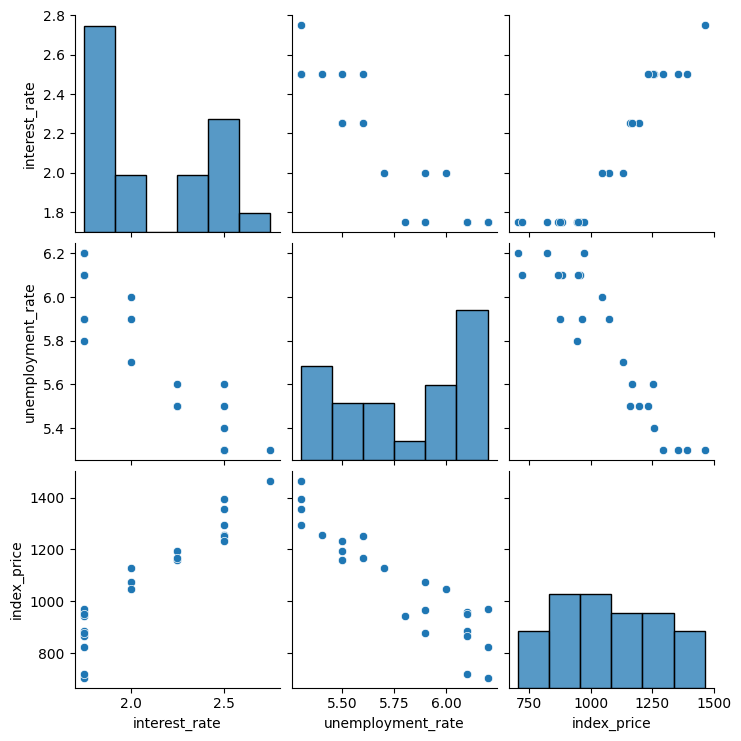

In [10]:
## visualition
sns.pairplot(df_index)

In [11]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment Rate')

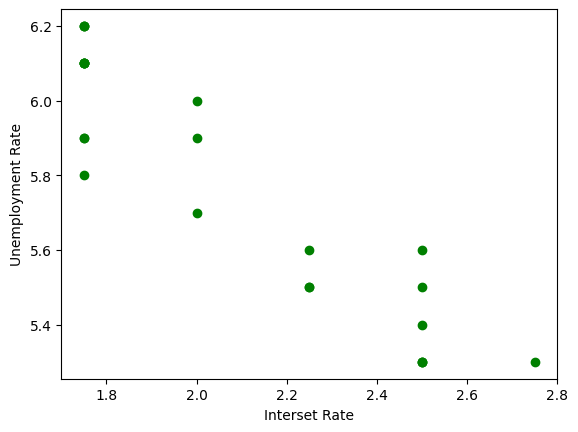

In [14]:
### visualize the data point more closely
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='g')
plt.xlabel("Interset Rate")
plt.ylabel("Unemployment Rate")

In [15]:
### independent and dependent features
# X=df_index[['interest_rate','unemployment_rate']]
X=df_index.iloc[:,:-1]
Y=df_index.iloc[:,-1]

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [25]:
from sklearn.preprocessing import StandardScaler


In [36]:
scalar=StandardScaler()
X_train=scalar.fit_transform(X_train)
X_test=scalar.fit_transform(X_test)

In [37]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [38]:
regression.fit(X_train,Y_train)

LinearRegression()

In [39]:
## cross validation
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,Y_train,scoring='neg_mean_squared_error',cv=3)
np.mean(validation_score)

np.float64(-5914.828180162392)

In [40]:
## prediction
Y_pred=regression.predict(X_test)
Y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [41]:
### Performance Matrix
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [42]:
mse=mean_squared_error(y_test,Y_pred)
mae=mean_absolute_error(y_test,Y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8108.567426306604
73.80444932337097
90.04758423359621


In [43]:
from sklearn.metrics import r2_score
score=r2_score(y_test,Y_pred)
print(score)
print(1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.7591371539010257
0.5985619231683761


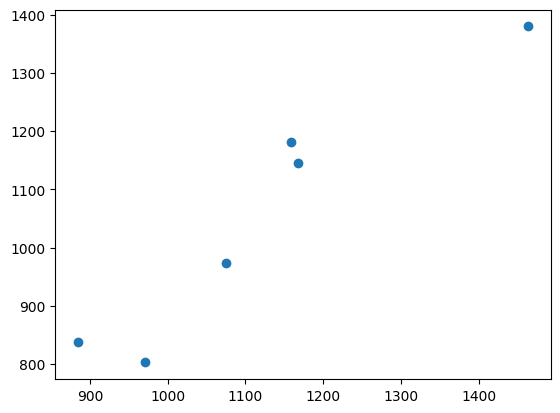

In [45]:
## Assumtions
plt.scatter(y_test,Y_pred)

In [46]:
residuals=y_test-Y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


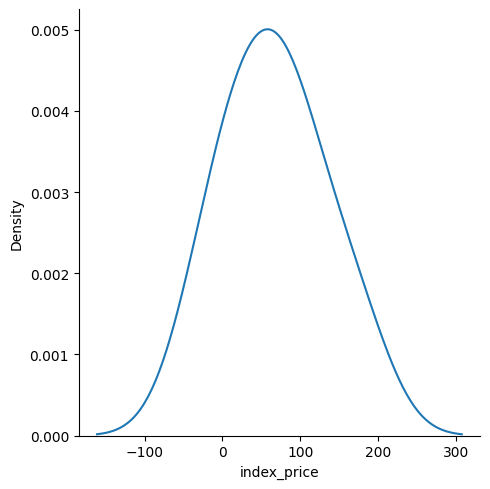

In [47]:
## plot the residuals
sns.displot(residuals,kind='kde')

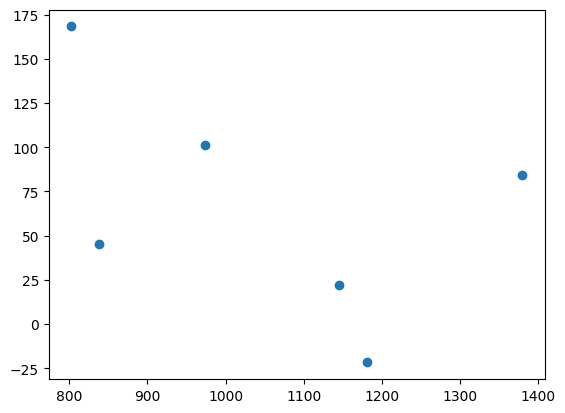

In [48]:
### create a scatter plot wrt predictions and residuals
plt.scatter(Y_pred,residuals)